In [1]:
# Importing all the required libraries 

import matplotlib.pyplot as plt
%matplotlib inline
import cv2                 
import numpy as np         
import os                  
from random import shuffle 
from tqdm import tqdm      
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
# Loading the dataset

TRAIN_DIR = 'C:/Users/hp/Downloads/PlantDiseaseDetection-master/PlantDiseaseDetection-master/train/train'
IMG_SIZE = 50

In [3]:
# Preprocessing and converting into arrays

labels = []
def label_img(img):
    word_label = img[0]
    if word_label == 'h': return 0
    elif word_label == 'b': return 1
    elif word_label == 'v': return 2
    elif word_label == 'l': return 3

    
def create_train_data():
    training_data = []
    IMG_SIZE = 50
    
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img[0])
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append(np.array(img))
        labels.append(label)
    return training_data

train_data = create_train_data()


100%|█████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:12<00:00, 326.83it/s]


In [4]:
# Data Analysis

print("Number of images in dataset = " + str(len(train_data)))

print("Number Of classes in dataset = " + str(len(set(labels))))

print("The labels of the classes are = " + str(set(labels)))

Number of images in dataset = 4000
Number Of classes in dataset = 4
The labels of the classes are = {0, 1, 2, 3}


In [ ]:
 countOfHealthyImages = labels.count(0)

print("Count of leaf images that belong to Healthy class = " + str(countOfHealthyImages))

In [5]:
countOfBacteriaImages = labels.count(1)

print("Count of leaf images that belong to Bacteria Class = " + str(countOfBacteriaImages))

Count of leaf images that belong to Bacteria Class = 1000


In [6]:
countOfViralImages = labels.count(2)

print("Count of leaf images that belong to Virus Class = " + str(countOfViralImages))

Count of leaf images that belong to Virus Class = 1000


In [7]:
countOfLateBlightImages = labels.count(2)

print("Count of leaf images that belong to LateBlight Class = " + str(countOfLateBlightImages))

Count of leaf images that belong to LateBlight Class = 1000


In [8]:
data = np.array(train_data)

labels = np.array(labels)


In [9]:
print("Shape of data :" + str(data.shape))
print("Shape of labels :" + str(labels.shape))

Shape of data :(4000, 50, 50, 3)
Shape of labels :(4000,)


In [10]:
# Splitting data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify = labels)


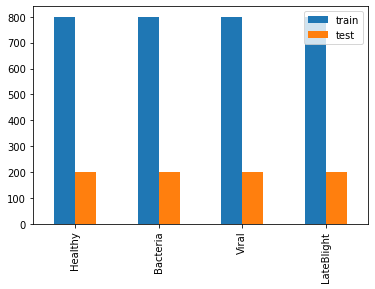

In [11]:
#Viasualization of training and testing data

_, train_counts = np.unique(y_train, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index= ["Healthy", "Bacteria", "Viral", "LateBlight"]
            ).plot.bar()
plt.show()

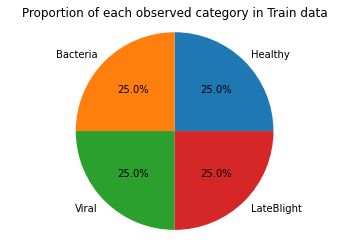

In [12]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0) , 
        labels= ["Healthy", "Bacteria", "Viral", "LateBlight"],
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category in Train data')
plt.show()

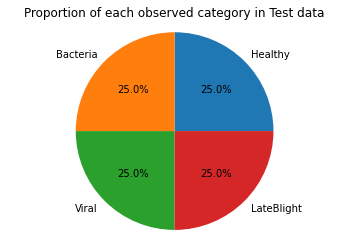

In [13]:
plt.pie(test_counts,
        explode=(0, 0, 0, 0) , 
        labels= ["Healthy", "Bacteria", "Viral", "LateBlight"],
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category in Test data')
plt.show()

In [14]:

print("Shape of X_train :" + str(X_train.shape))
print("Shape of X_test :" + str(X_test.shape))
print("Shape of y_train :" + str(y_train.shape))
print("Shape of y_test :" + str(y_test.shape))

Shape of X_train :(3200, 50, 50, 3)
Shape of X_test :(800, 50, 50, 3)
Shape of y_train :(3200,)
Shape of y_test :(800,)


In [15]:
#Converting labels to categorical values

y_train = to_categorical(y_train, 4)

y_test = to_categorical(y_test, 4)


In [16]:
# Constructing Sequential Classifier

Classifier = Sequential()

Classifier.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))

Classifier.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))

Classifier.add(MaxPool2D(pool_size=(2, 2)))

Classifier.add(Dropout(rate=0.25))

Classifier.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

Classifier.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

Classifier.add(MaxPool2D(pool_size=(2, 2)))

Classifier.add(Dropout(rate=0.25))

Classifier.add(Flatten())

Classifier.add(Dense(256, activation='relu'))

Classifier.add(Dropout(rate=0.5))

Classifier.add(Dense(4, activation='softmax'))


In [17]:
# Classifier Analysis

Classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [18]:
Classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
#Fitting the data into model

epochs = 15
history = Classifier.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/15
100/100 [==============================] - 26s 242ms/step - loss: 5.3993 - accuracy: 0.3043 - val_loss: 0.6787 - val_accuracy: 0.7163
Epoch 2/15
100/100 [==============================] - 23s 226ms/step - loss: 0.7632 - accuracy: 0.6879 - val_loss: 0.5362 - val_accuracy: 0.8062
Epoch 3/15
100/100 [==============================] - 23s 228ms/step - loss: 0.5068 - accuracy: 0.8069 - val_loss: 0.3789 - val_accuracy: 0.8650
Epoch 4/15
100/100 [==============================] - 23s 225ms/step - loss: 0.4142 - accuracy: 0.8469 - val_loss: 0.4341 - val_accuracy: 0.8325
Epoch 5/15
100/100 [==============================] - 23s 229ms/step - loss: 0.2939 - accuracy: 0.8981 - val_loss: 0.2413 - val_accuracy: 0.8988
Epoch 6/15
100/100 [==============================] - 25s 248ms/step - loss: 0.2287 - accuracy: 0.9162 - val_loss: 0.2617 - val_accuracy: 0.9100
Epoch 7/15
100/100 [==============================] - 24s 235ms/step - loss: 0.2583 - accuracy: 0.9083 - val_loss: 0.2203 - val_ac

In [20]:
# Saving the model locally

Classifier.save("Project1.h5")

In [23]:
#Average accuracy of train data

print("The train accuracy of the model is")
np.mean(history.history['accuracy'])

The train accuracy of the model is


0.8699374993642172

In [24]:
#Average accuracy of validation data

print("The test accuracy of the model is")
np.mean(history.history['val_accuracy'])

The test accuracy of the model is


0.8987499992052714

In [25]:
#Train_Report

from sklearn.metrics import classification_report

# predict 
pred = Classifier.predict(X_train, batch_size = 32)
pred = np.argmax(pred, axis=1)

y_train = np.argmax(y_train, axis = 1)
print(y_train.shape, pred.shape)
print(y_train[:5], pred[:5])


(3200,) (3200,)
[3 2 2 0 1] [3 2 2 0 1]


In [26]:
print(classification_report(y_train, pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       800
           1       0.97      0.99      0.98       800
           2       0.98      1.00      0.99       800
           3       1.00      0.97      0.98       800

    accuracy                           0.99      3200
   macro avg       0.99      0.99      0.99      3200
weighted avg       0.99      0.99      0.99      3200



In [29]:
#Test_Report

from sklearn.metrics import classification_report

# predict 
pred = Classifier.predict(X_test, batch_size = 32)
pred = np.argmax(pred, axis=1)

y_test = np.argmax(y_test, axis = 1)
print(y_test.shape, pred.shape)
print(y_test[:5], pred[:5])


(800,) (800,)
[0 1 0 1 0] [1 1 0 1 0]


In [30]:
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       200
           1       0.91      0.94      0.92       200
           2       0.93      0.98      0.96       200
           3       0.97      0.88      0.92       200

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800



In [31]:
# Testing

from tensorflow.keras.models import load_model
IMG_SIZE = 50
#Loading the saved model
model = load_model(r"Project1.h5")

#Uploading image of a leaf which belongs to class of Bacteria
file_path = 'C:/Users/hp/Downloads/PlantDiseaseDetection-master/PlantDiseaseDetection-master/train/train/b (1).jpg'
image = Image.open(file_path)
image = image.resize((50,50))
image = np.expand_dims(image, axis=0)
image = np.array(image) 

#Using predict_classes for predicting the class of image
pred = model.predict_classes([image])[0]


print(pred)
if pred == 0:
    print("The class to which the sample leaf belongs to is Healthy")
elif pred == 1:
    print("The class to which the sample leaf belongs to is Bacteria")
elif pred == 2:
    print("The class to which the sample leaf belongs to is Viral")
elif pred == 3:
    print("The class to which the sample leaf belongs to is Lateblight")

c:\users\hp\env\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1
The class to which the sample leaf belongs to is Bacteria
